In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def xy_a_s(x, y, L):
    return y * L + x

def s_a_xy(s, L):
    return s % L, s // L

def vecino(s, j, L):
    if j == 0:  
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 1:  
        if s // L == L - 1:
            return empty
        else:
            return s + L
    elif j == 2:  
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 3:  
        if s // L == 0:
            return empty
        else:
            return s - L

def boundaries(L):
    N = L * L
    nn = np.zeros((N, 4), dtype=int)
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j, L)
    return nn

In [3]:
def HLA(L, p):
    N = L * L
    site = np.full(N, empty, dtype=np.short)  
    
    nn = boundaries(L) 
    
    xseed, yseed = L // 2, L // 2
    sseed = xy_a_s(xseed, yseed, L)
    site[sseed] = 1  
    cluster = np.array([sseed])
    
    per = np.array([nn[sseed, j] for j in range(4) if nn[sseed, j] != empty], dtype=int)
    site[per] = 2  
    
    while len(per) > 0:
        index = np.random.randint(len(per))
        snew = per[index]
        per = np.delete(per, index)
        escPer = np.random.random()
        if escPer < p:
            site[snew] = 1  
            cluster = np.append(cluster, snew)
            for j in range(4):
                snewper = nn[snew, j]
                if snewper != empty and site[snewper] == empty:
                    per = np.append(per, snewper)
                    site[snewper] = 2  
        else:
            site[snew] = empty
        
    return site, cluster, nn

[[  1  16  -1  -1]
 [  2  17   0  -1]
 [  3  18   1  -1]
 ...
 [254  -1 252 237]
 [255  -1 253 238]
 [ -1  -1 254 239]]
[-1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1]


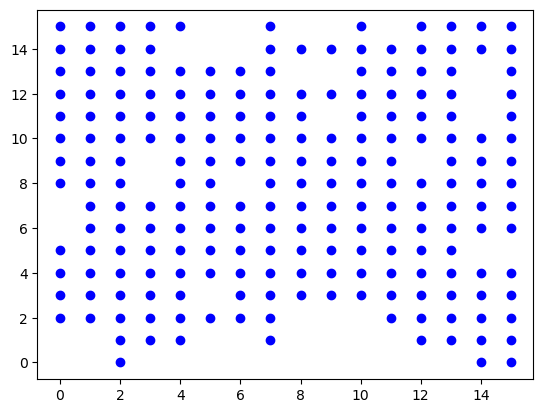

In [22]:
L = 16
p = 0.59275
empty = -1

site, cluster, nn = HLA(L, p)

print(nn)
print(site)

ncluster = np.array([s_a_xy(s, L) for s in cluster])

fig, ax = plt.subplots()
ax.plot(ncluster[:, 0], ncluster[:, 1], 'bo')
plt.show()
